### CS 5190 Assignment 4
### Johnson Wei

### Task 1: Hough Transformation for Line and Circle Detection

NOTE: All directory paths from source code needs to be changed to the grader's relative directory path.
This code block was used to determine my fine-tuned parameters for creating a desired mask of the pool table image.
Only run this code to see the creation process and follow the guidelines below.

In [ ]:
# This is a convention used for dealing with the createTrackbar function
def nothing(x):
    pass

# 4 windows will pop up when running this code block; focus on the "Trackbars" and the "mask" windows to visually see changes
# while adjusting the trackbar sliders.
# Set the slider positions accordingly:
# Lower H = 64, Lower S = 148, Lower V = 56 (these correspond to Hue, Saturation, and Value, respectively)
# Leave the Upper H, S, V unchanged
# By fine tuning the lower HSV, we will get a desired mask image of the pool table.
frame = cv2.imread(pool_table)
cv2.namedWindow("Trackbars")

cv2.createTrackbar("Lower - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("Lower - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("Lower - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("Upper - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("Upper - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("Upper - V", "Trackbars", 255, 255, nothing)

# purpose: to visually fine tune using track bars
while True:
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    l_h = cv2.getTrackbarPos("Lower - H", "Trackbars")
    l_s = cv2.getTrackbarPos("Lower - S", "Trackbars")
    l_v = cv2.getTrackbarPos("Lower - V", "Trackbars")
    u_h = cv2.getTrackbarPos("Upper - H", "Trackbars")
    u_s = cv2.getTrackbarPos("Upper - S", "Trackbars")
    u_v = cv2.getTrackbarPos("Upper - V", "Trackbars")
    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    result = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("result", result)
    key = cv2.waitKey(1)
    if key == 27:
        break


cv2.destroyAllWindows()

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

pool_table = r"C:\Users\Johnson\Desktop\5190\workspace\images\pool_table.jpg" # path directory in Windows string format

frame = cv2.imread(pool_table)
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# these values were fine tuned using the trackbars
l_h = 64
l_s = 148
l_v = 56
lower_blue = np.array([l_h, l_s, l_v])
u_h = 179
u_s = 255
u_v = 255
upper_blue = np.array([u_h, u_s, u_v])

mask = cv2.inRange(hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(frame, frame, mask=mask)

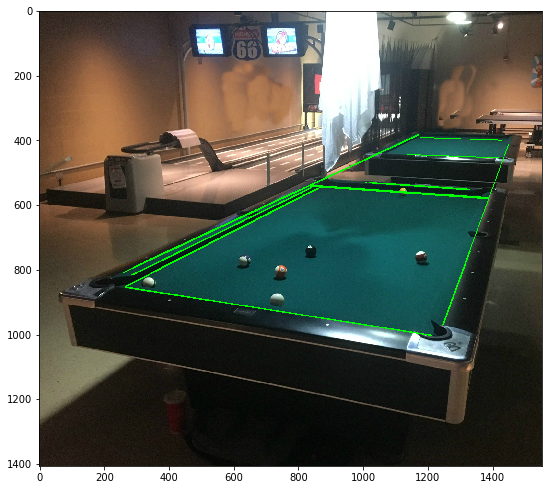

In [19]:
# process and get proper lines corresponding to edges of pool table
img = cv2.imread(pool_table)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=200, maxLineGap=200)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.rcParams["figure.figsize"] = [9, 9]
plt.imshow(img, cmap='Greys_r')
plt.show()

### Part 1a: Interior lines of pool table

In [20]:
# fine tuned parameters to determine the 4 edges of pool table
# good indexes to choose from are: 0,1,13,16
index = 13
Ax=lines[index][0][0]
Ay=lines[index][0][1]
Bx=lines[index][0][2]
By=lines[index][0][3]

lenAB = math.sqrt((Ax-Bx)**2 + (Ay-By)**2)
x_factor = abs(Bx-Ax)/lenAB
y_factor = abs(By-Ay)/lenAB
scale_length = 200

print(lines[index])
print('lenAB= ', lenAB)
print('x_factor= ', x_factor)
print('y_factor= ', y_factor)
print('x scale length= ', math.ceil(x_factor * scale_length))
print('y scale length= ', math.ceil(y_factor * scale_length))

[[1005  530 1321  552]]
lenAB=  316.76489704511135
x_factor=  0.9975852846945903
y_factor=  0.069452140073674
x scale length=  200
y scale length=  14


In [22]:
import math

test = cv2.imread(pool_table)
# test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
thickness = 2
green = (0,255,0)

# index 1 = [ 289  815  841  546] -> (200,859),(930,502) # left most edge
# index 0 = [ 266  852 1211 1001] -> (167,836)(1310,1017) # bottom most 
# index 13 = [ 1005  530 1321  552] -> (805,516)(1521,566) # top most 
# index 16 = [ 1245  969 1448  412] -> (1210,1063)(1413,506) # right most
index = np.array([1,0,13,16], dtype=np.uint8)

lenAB = math.sqrt((Ax-Bx)**2 + (Ay-By)**2)
x_factor = abs(Bx-Ax)/lenAB
y_factor = abs(By-Ay)/lenAB

# cv2.line(test,(Ax,Ay),(Bx,By),green,thickness)
cv2.line(test,(200,859),(930,502),green,thickness)
cv2.line(test,(167,836),(1310,1017),green,thickness)
cv2.line(test,(805,516),(1521,566),green,thickness)
cv2.line(test,(1210,1063),(1413,506),green,thickness)

# Save the lines image to the disk
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\images\detected_lines.jpg", test)

True

### Part 1b: Detected balls overlaid on top of original image

In [23]:
pool_mask = r"C:\Users\Johnson\Desktop\5190\workspace\images\pool_mask.jpg" # path directory in Windows string format

# Load image, grayscale, Otsu's threshold
image = cv2.imread(pool_mask)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 9, 75, 75)
# gray = cv2.medianBlur(gray,5)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, minDist=thresh.shape[0]/8, 
                           param1=50, param2=30, minRadius=1, maxRadius=40)
# param1=100, param2=10

# Draw circles
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x,y,r) in circles:
        # circle outline
        cv2.circle(image, (x,y), r, (0,255,0), 3)
        # draw the center of the circle
        cv2.circle(image,(x,y),2,(0,0,255),3)

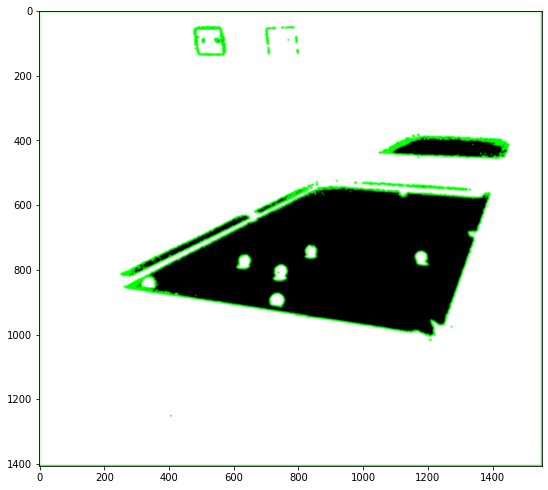

In [25]:
img = thresh.copy()
# img = cv2.bitwise_not(img)
image_space, contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Must convert binary image to BGR prior to drawing contours in color
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# To draw all the contours in an image
cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.rcParams["figure.figsize"] = [9, 9]
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

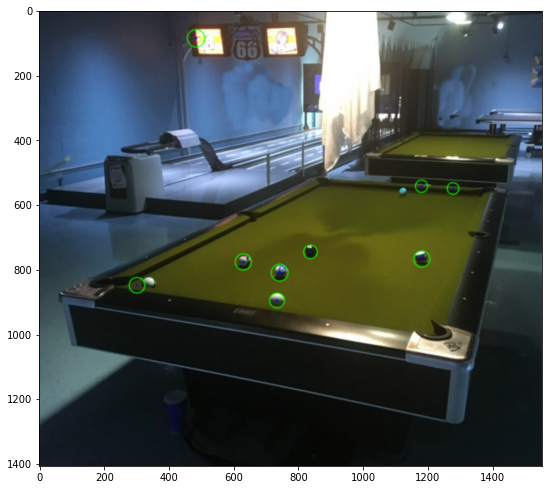

True

In [26]:
# I've noticed some false positives, but this was the best that I could do.
pool_img = r"C:\Users\Johnson\Desktop\5190\workspace\images\pool_table.jpg" # path directory in Windows string format
# colors
green = (0,255,0)
red = (0,0,255)
blue = (255,0,0)

# Load image, grayscale, Otsu's threshold
image = cv2.imread(pool_img)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 9, 75, 75)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)

for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    
# All contours
# for i in range(len(contours)):
#     cv2.drawContours(image, contours_poly, i, blue, thickness)
#     cv2.circle(image, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), green, 2)
#     cv2.circle(image, (int(centers[i][0]), int(centers[i][1])), 2, red, 2)

# discovered the ranges from observations
area_range = (1000,3000)
coi = [] # circles of interest

for i in range(len(radius)):
    area = np.pi * radius[i]**2
    if area >= area_range[0] and area <= area_range[1]:
        coi.append(i)

# prints suspect circles
for i in range(len(coi)):
    cv2.circle(image, (int(centers[coi[i]][0]), int(centers[coi[i]][1])), int(radius[coi[i]]), green, 2)
    cv2.circle(image, (int(centers[coi[i]][0]), int(centers[coi[i]][1])), 2, red, 2)

# prints singled-out index (i)
# i = 7
# cv2.circle(image, (int(centers[coi[i]][0]), int(centers[coi[i]][1])), int(radius[coi[i]]), green, 2)
# cv2.circle(image, (int(centers[coi[i]][0]), int(centers[coi[i]][1])), 2, red, 2)
    
plt.rcParams["figure.figsize"] = [9, 9]
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Save the detected circles image to the disk
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\images\detected_circles.jpg", image)

### Part 1c: Show 4 corners of pool table

In [27]:
pool_mask = r"C:\Users\Johnson\Desktop\5190\workspace\images\pool_mask.jpg"
img = cv2.imread(pool_mask)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype('float32')

corners = cv2.goodFeaturesToTrack(gray,400,0.1,20)
corners = np.int0(corners)

result = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(result,(x,y),3,(0,0,255),10)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

In [28]:
# find the corners of the pool table by going through the corners list
suspect_corners = []

for i in range(len(corners)):
    # if x and y are within a specific range of pool table (upper region)
    if corners[i][0][1] >= 500 and corners[i][0][1] <= 600:
        pair = (corners[i][0][0],corners[i][0][1])
        suspect_corners.append(pair)
    # if x and y are within lower region
    if corners[i][0][1] >= 800 and corners[i][0][1] <= 1000:
        pair = (corners[i][0][0],corners[i][0][1])
        suspect_corners.append(pair) 

# print('len of suspect_corners = ', len(suspect_corners))
# print(suspect_corners)

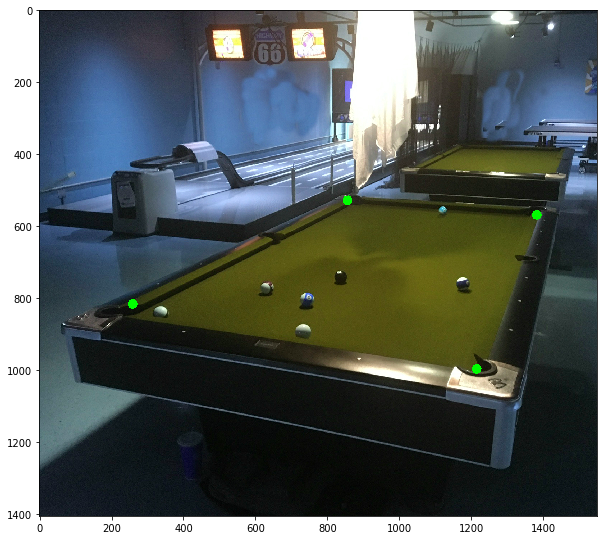

True

In [29]:
img_str = r"C:\Users\Johnson\Desktop\5190\workspace\images\pool_table.jpg"
img = cv2.imread(img_str)

# to print all 
# for i in range(len(suspect_corners)):
#     x = suspect_corners[i][0]
#     y = suspect_corners[i][1]
#     cv2.circle(result_rgb,(x,y),3,(255,0,0),10)

# top left corner
cv2.circle(img,(857, 528),3,(0,255,0),20) 
# top right corner
cv2.circle(img,(1384,569),3,(0,255,0),20)
# bot left corner
cv2.circle(img,(260,816),3,(0,255,0),20) 
# bot right corner
cv2.circle(img,(1217, 997),3,(0,255,0),20)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# Save the detected corners image to the disk
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\images\detected_4corners.jpg", img)

### Task 2: Image Pyramids

In [44]:
# Harley Quinn = black.jpg
# Margot Robbie = white.jpg
# Composite Mask = mask.jpg
black = r"C:\Users\Johnson\Desktop\5190\workspace\images\black.jpg" # path directory in Windows string format
white = r"C:\Users\Johnson\Desktop\5190\workspace\images\white.jpg"
mask = r"C:\Users\Johnson\Desktop\5190\workspace\images\mask.jpg"

black_img = cv2.imread(black).astype(float)
white_img = cv2.imread(white).astype(float)
mask_img = cv2.imread(mask).astype(float)/255

print('black', black_img.shape)
print('white', white_img.shape)
print('mask', mask_img.shape)

black (350, 700, 3)
white (350, 700, 3)
mask (350, 700, 3)


In [45]:
# get the Gaussian pyramid of our 3 images
# img is the image array
# levels represents the number of levels
def getGaussPyr(img, levels):
    lower = img.copy()
    gauss_pyr = [lower] # initial level, we will build on top of this
    for i in range(levels):
        lower = cv2.pyrDown(lower)
        gauss_pyr.append(np.float32(lower))
    return gauss_pyr

# get the Laplacian pyramid
# gauss_pyr is the gaussian pyramid 
def getLaplacianPyr(gauss_pyr):
    lap_top = gauss_pyr[-1]
    levels = len(gauss_pyr) - 1
    
    lap_pyr = [lap_top]
    # starting from the last index 
    for i in range(levels,0,-1):
        size = (gauss_pyr[i - 1].shape[1], gauss_pyr[i - 1].shape[0])
        gauss_expansion = cv2.pyrUp(gauss_pyr[i], dstsize=size)
        laplacian = np.subtract(gauss_pyr[i-1], gauss_expansion)
        lap_pyr.append(laplacian)
    return lap_pyr

# blends black, white, and mask images 
def blend(lap_img1,lap_img2,mask_pyr):
    blended_list = []
    for la,lb,mask in zip(lap_img1,lap_img2,mask_pyr):
        ls = lb * mask + la * (1.0 - mask)
        blended_list.append(ls)
    return blended_list

# get reconstructed image using the laplacian pyramid
def getReconstructedImage(lap_pyr):
    lap_top = lap_pyr[0]
    lap_list = [lap_top]
    levels = len(lap_pyr) - 1
    for i in range(levels):
        size = (lap_pyr[i + 1].shape[1], lap_pyr[i + 1].shape[0])
        laplacian_expanded = cv2.pyrUp(lap_top, dstsize=size)
        lap_top = cv2.add(lap_pyr[i+1], laplacian_expanded)
        lap_list.append(lap_top)
    return lap_list

In [46]:
m_str = r"C:\Users\Johnson\Desktop\5190\workspace\images\mask.jpg"

black_img = cv2.imread(black).astype('float32')
white_img = cv2.imread(white).astype('float32')

# Applying mask into binary image and then converting it to color
mask = cv2.imread(m_str,0)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask = mask.astype('float32')/255 # prevent artifacts

# trial and error from choosing different levels
levels = 7

# For harley quinn (black image), we calculate Gauss and Laplacian pyramids
gauss_pyr_black = gaussian_pyramid(black_img, levels)
laplacian_pyr_black = laplacian_pyramid(gauss_pyr_black)

# For Margot Robbie (white image), we calculate Gauss and Laplacian pyramids
gauss_pyr_white = getGaussPyr(white_img, levels)
laplacian_pyr_white = getLaplacianPyr(gauss_pyr_white)

# Calculating the Gauss pyramid for the provided mask image in a similar fashion related to the slides (reverse).
mask_pyr_result = gaussian_pyramid(mask, levels)
mask_pyr_result.reverse()

# Blending the images
add_laplace = blend(laplacian_pyr_1,laplacian_pyr_2,mask_pyr_result)
# Reconstructing the original images
final_result  = reconstruct(add_laplace)

# res = [levels]
# scale_factor = 255.0/np.max(res)
# res = cv2.convertScaleAbs(res, alpha=scale_factor)

# Save the  image
cv2.imwrite(r"C:\Users\Johnson\Desktop\5190\workspace\images\_test.jpg", final_result[levels])

True

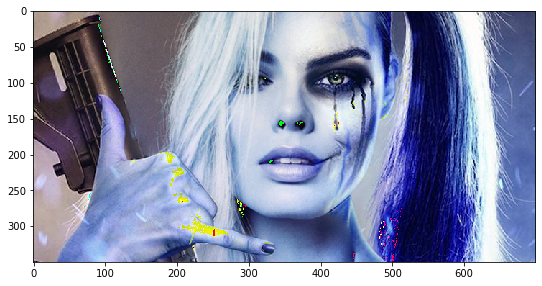

In [47]:
# This is to verify final result image; plt shows some artifacts, but the saved output image comes out nicely 
# without the artifacts.
plt.imshow(np.uint8(final[num_levels]))
plt.show()